In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from c19_load import load_multiple_countries

In [2]:
ASEAN_COUNTRIES = ['Singapore', 'Thailand', 'Malaysia', 'Indonesia', 'Vietnam', 'Cambodia', 'Philippines', 'Brunei']
df = load_multiple_countries(ASEAN_COUNTRIES)

LAST_DAYS = 30

annotate_kwargs = dict(
    s='Based on COVID Data Repository by Johns Hopkins CSSE \nbryan.blackbee', 
    xy=(0.05, 0.00), xycoords='figure fraction', fontsize=10)

In [3]:
display(df)

,country,date,total,new,deaths,discharged,active
0,Singapore,2020-01-22,0,0,0,0,0
1,Singapore,2020-01-23,1,1,0,0,1
2,Singapore,2020-01-24,3,2,0,0,3
3,Singapore,2020-01-25,3,0,0,0,3
4,Singapore,2020-01-26,4,1,0,0,4
...,...,...,...,...,...,...,...
1171,Brunei,2020-06-12,141,0,2,138,1
1172,Brunei,2020-06-13,141,0,2,138,1
1173,Brunei,2020-06-14,141,0,2,138,1
1174,Brunei,2020-06-15,141,0,2,138,1


In [4]:
# 2nd graph, used for highlighting WHO declaring pandaemic
x = np.arange(df.shape[0])
df2 = pd.DataFrame({'x' : x, 'y' : 0})

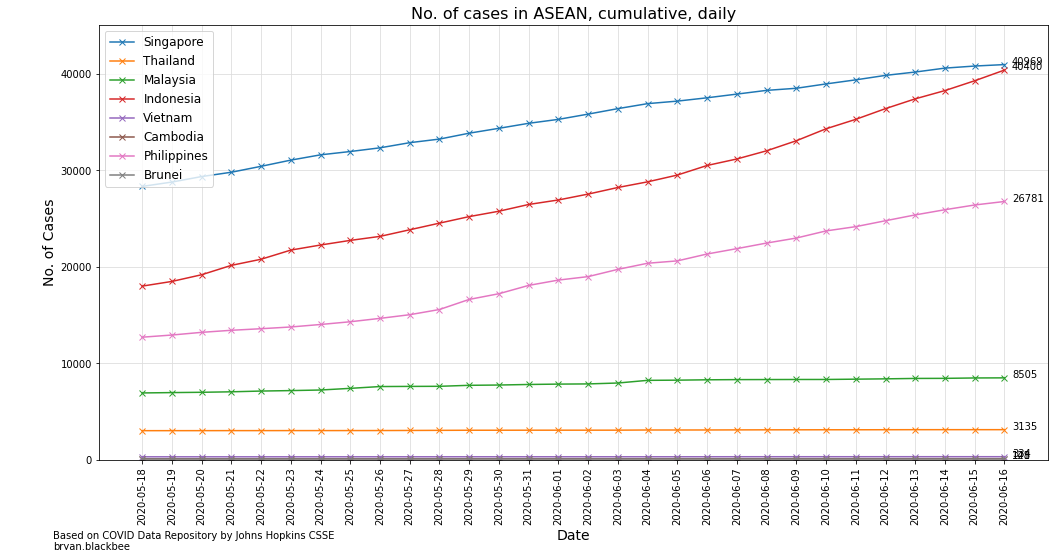

In [7]:
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(1,1,1)

# Used for determination of values of axes
countries = []
todayscases = []

# Plot
for c in ASEAN_COUNTRIES:
    # Plot
    df_d = df[df.country==c].copy()
    df_d.tail(LAST_DAYS).plot(kind='line', x='date', y='total', ax=ax, marker='x', linewidth=1.5)
    # Collect data
    countries.append(c)
    todayscases.append(df_d['total'].tail(1).tolist()[0])

# x-axis
ax.set_xticks(range(LAST_DAYS))
ax.set_xticklabels(df['date'].tail(LAST_DAYS), rotation=90)
ax.set_xlabel("Date", fontsize=14)

# y-axis
NUM_YTICKS = 20
todayscases_max = max(todayscases)
yaxis_max = todayscases_max*1.1
ax.set_ylim(0, yaxis_max)

ax.set_ylabel("No. of Cases", fontsize=14)

# features of graph
ax.grid(color='GAINSBORO')
ax.legend(countries, fontsize=12)

# no. of cases annotation
for i, v in enumerate(todayscases):
    ax.text(df_d.tail(LAST_DAYS).shape[0]-0.75, v, str(v), fontsize=10)

# title
ax.set_title("No. of cases in ASEAN, cumulative, daily", fontsize=16)

# WHO Declares Pandemic
df_t = df.tail(LAST_DAYS).copy()
_ = df_t.reset_index(inplace=True, drop=True)

ax.annotate(**annotate_kwargs)

plt.show()

In [8]:
pivot_raw = df[(df.country.isin(ASEAN_COUNTRIES)) & (df.date.isin(df['date'].unique()[-int(LAST_DAYS/3):]))][['country', 'date', 'total']]
pivot_raw = pivot_raw.copy()
pd.pivot_table(pivot_raw, columns=['date'], index='country')

total                                                         \
date        2020-06-07 2020-06-08 2020-06-09 2020-06-10 2020-06-11 2020-06-12   
country                                                                         
Brunei             141        141        141        141        141        141   
Cambodia           126        126        126        126        126        126   
Indonesia        31186      32033      33076      34316      35295      36406   
Malaysia          8322       8329       8336       8338       8369       8402   
Philippines      21895      22474      22992      23732      24175      24787   
Singapore        37910      38296      38514      38965      39387      39850   
Thailand          3112       3119       3121       3125       3125       3129   
Vietnam            331        332        332        332        332        333   

                                                         
date        2020-06-13 2020-06-14 2020-06-15 2020-06-16  
country                                                  
Brunei             141        141        141        141  
Cambodia           128        128        128        128  
Indonesia        37420      38277      39294      40400  
Malaysia          8445       8453       8494       8505  
Philippines      25392      25930      26420      26781  
Singapore        40197      40604      40818      40969  
Thailand          3134       3135       3135       3135  
Vietnam            334        334        334        334

Sources: 

[COVID-19 outbreak 'a pandemic': WHO chief](https://www.channelnewsasia.com/news/world/covid-19-coronavirus-pandemic-who-chief-12528328)